<a href="https://colab.research.google.com/github/mdeepika12/AIML/blob/main/2313031_Assignment2_LifeExpectancyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df= pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:

df.drop('Country',axis=1,inplace=True)

In [ ]:
df.drop('Year',axis=1,inplace=True)

In [ ]:
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.drop('Status',axis=1,inplace=True)

In [ ]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.isnull().sum()

,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34
under-five deaths,0
Polio,19


In [ ]:
((df.isnull().sum()/len(df))*100).round(3)

,0
Life expectancy,0.340
Adult Mortality,0.340
infant deaths,0.000
Alcohol,6.603
percentage expenditure,0.000
Hepatitis B,18.822
Measles,0.000
BMI,1.157
under-five deaths,0.000
Polio,0.647


In [ ]:
df.columns[1]

'Adult Mortality'

In [ ]:
df.columns[8]

'under-five deaths '

In [ ]:
# filling the null value with mean of the feature
df["Life expectancy "].fillna(df["Life expectancy "].mean(), inplace=True)
df["Adult Mortality"].fillna(df["Adult Mortality"].mean(), inplace=True)
df["infant deaths"].fillna(df["infant deaths"].mean(), inplace=True)
df["Alcohol"].fillna(df["Alcohol"].mean(), inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace=True)
df['Polio'].fillna(df['Polio'].mean(), inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(), inplace=True)
df[' BMI '].fillna(df[' BMI '].mean(), inplace=True)
df['under-five deaths '].fillna(df['under-five deaths '].mean(), inplace=True)
df['GDP'].fillna(df['GDP'].mean(), inplace=True)
df['Population'].fillna(df['Population'].mean(), inplace=True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(), inplace=True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(), inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)



In [ ]:
df.isnull().sum()

,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0
Polio,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2938 non-null   float64
 1   Adult Mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2938 non-null   float64
 6   Measles                          2938 non-null   int64  
 7    BMI                             2938 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2938 non-null   float64
 10  Total expenditure                2938 non-null   float64
 11  Diphtheria                       2938 non-null   float64
 12   HIV/AIDS           

In [ ]:
print("Row & Column")
df.shape

Row & Column


(2938, 19)

In [ ]:
# Normalization of dataset
scaler = StandardScaler()
df.scaler = scaler.fit_transform(df)


In [ ]:
df.nunique()

,0
Life expectancy,363
Adult Mortality,426
infant deaths,209
Alcohol,1077
percentage expenditure,2328
Hepatitis B,88
Measles,958
BMI,609
under-five deaths,252
Polio,74


In [ ]:
df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

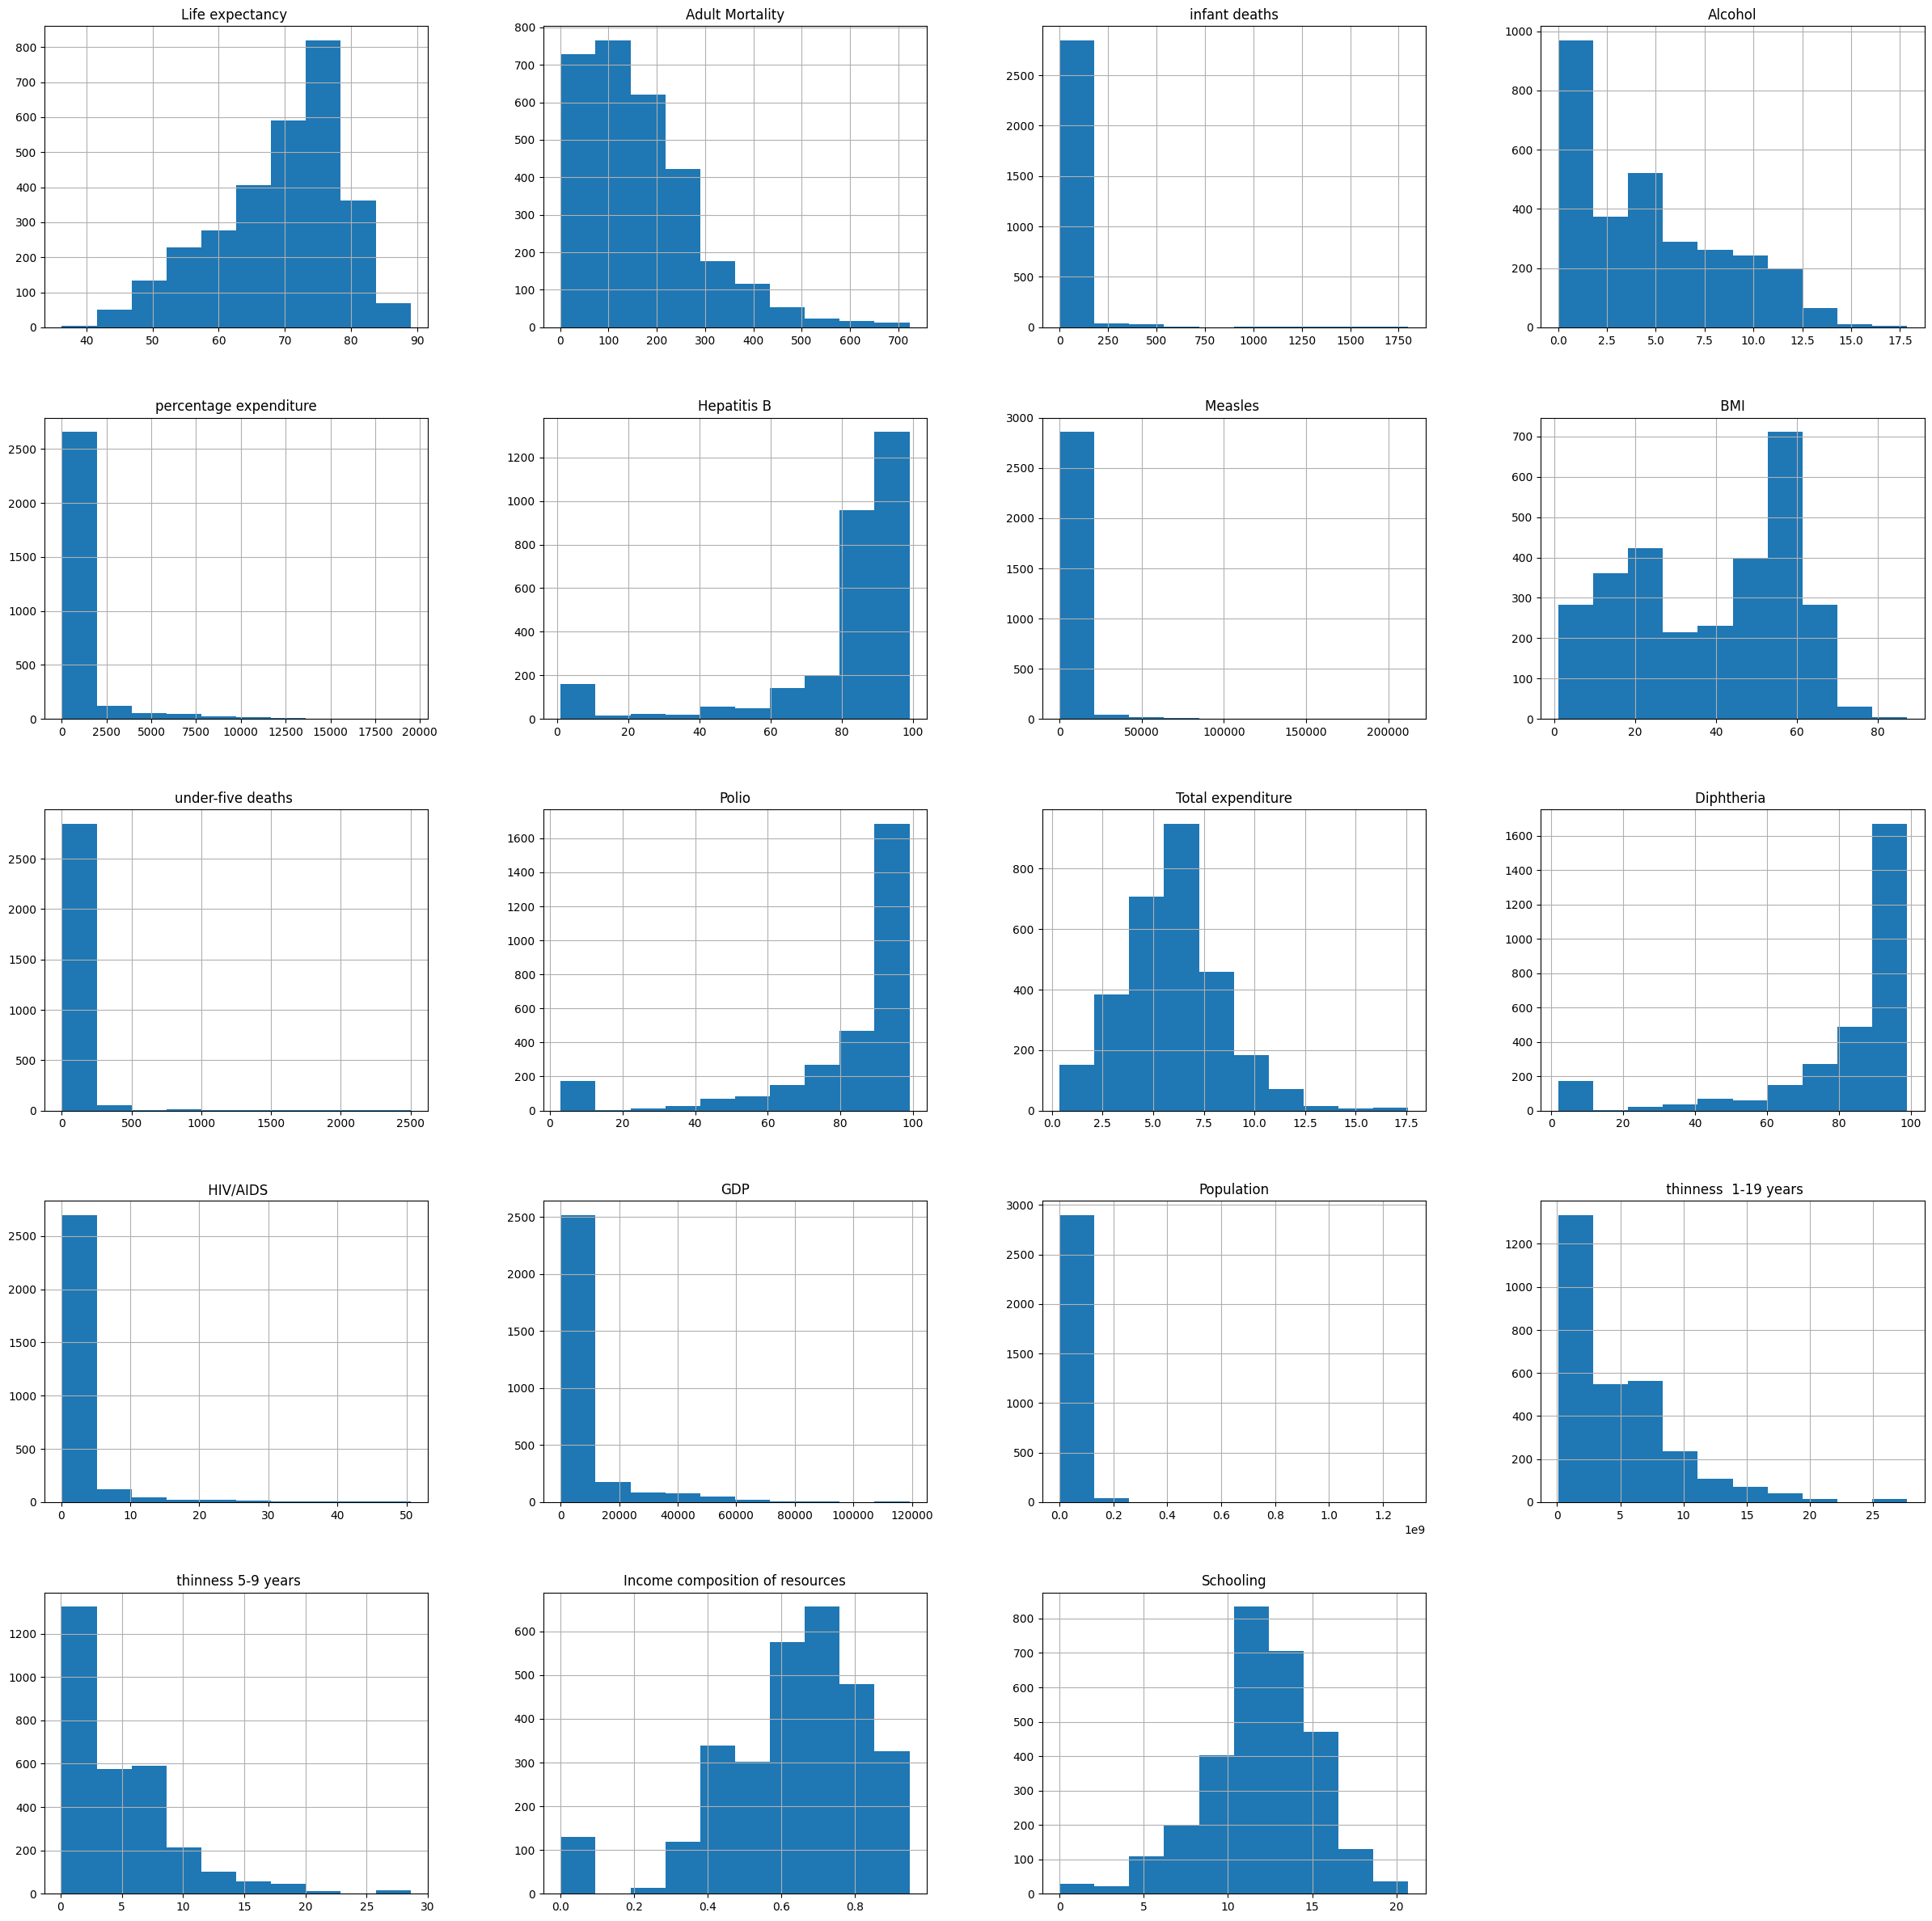

In [ ]:
df.hist(figsize=(30,30))
plt.show()

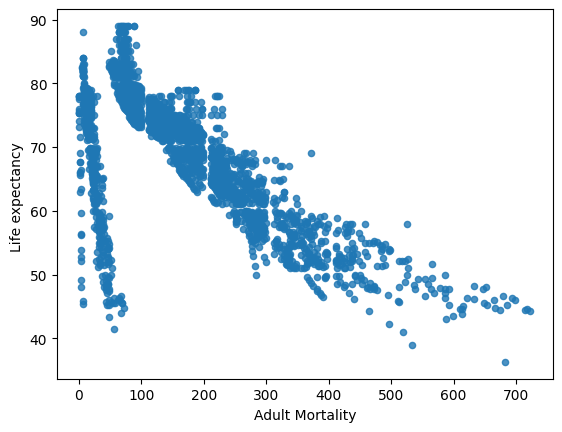

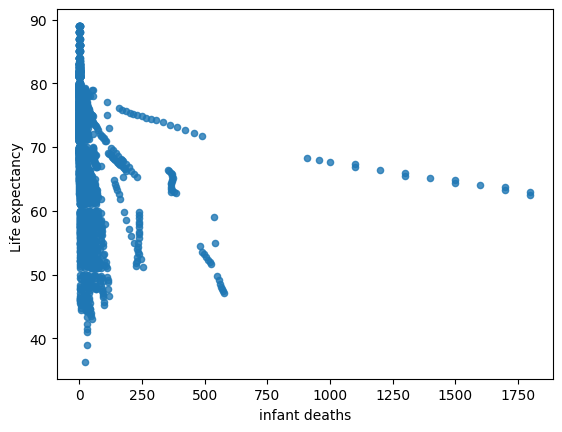

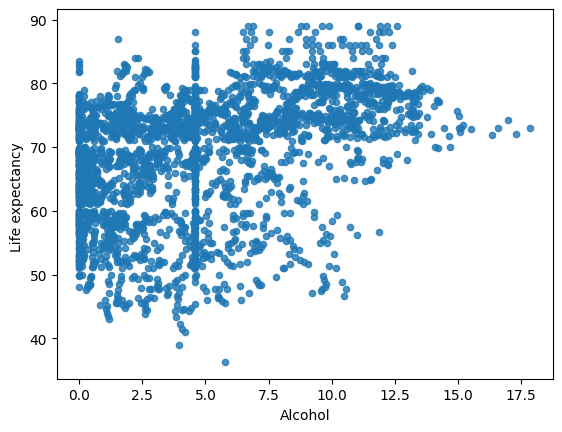

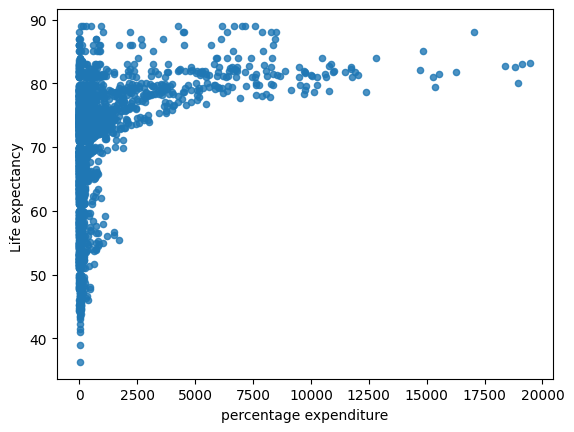

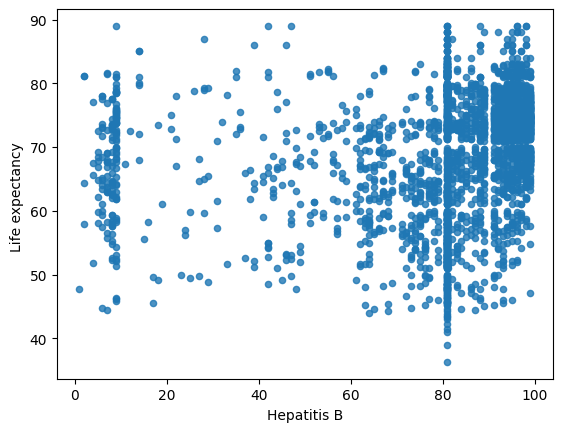

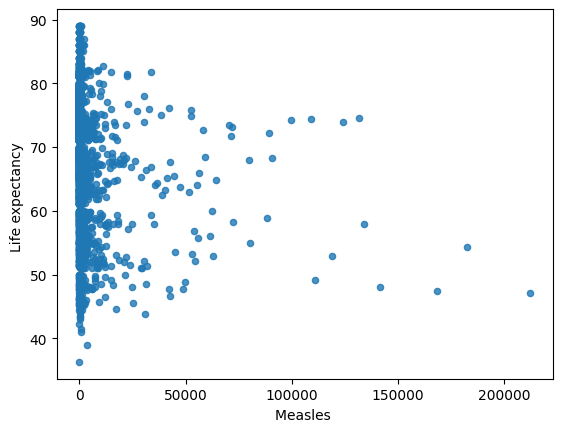

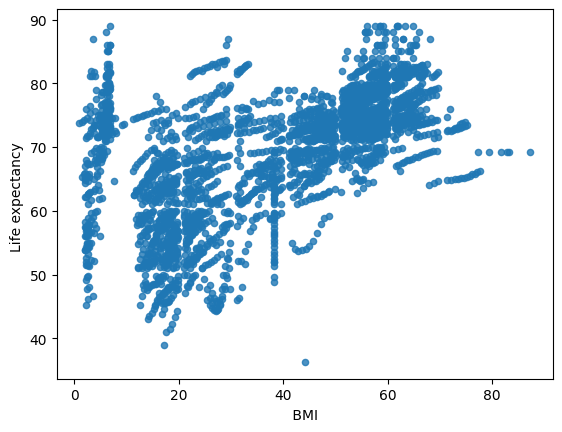

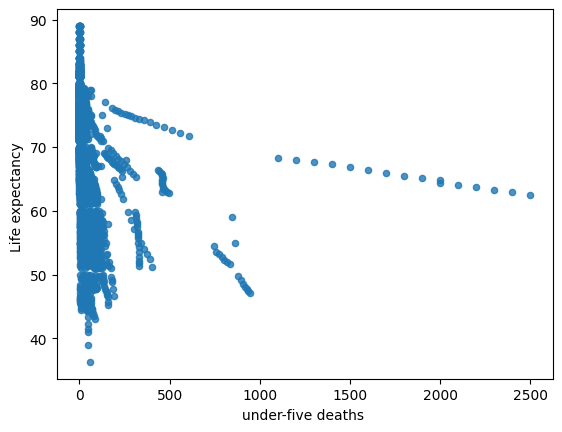

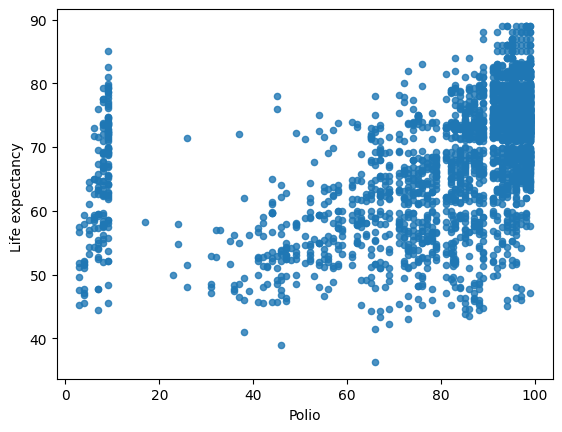

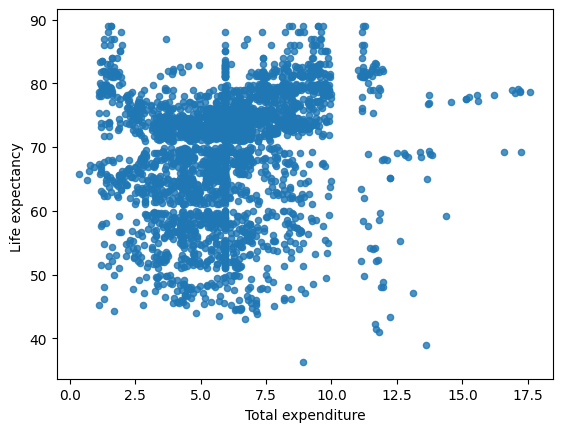

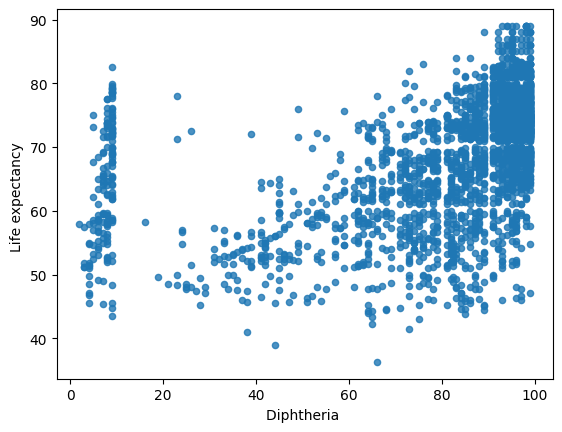

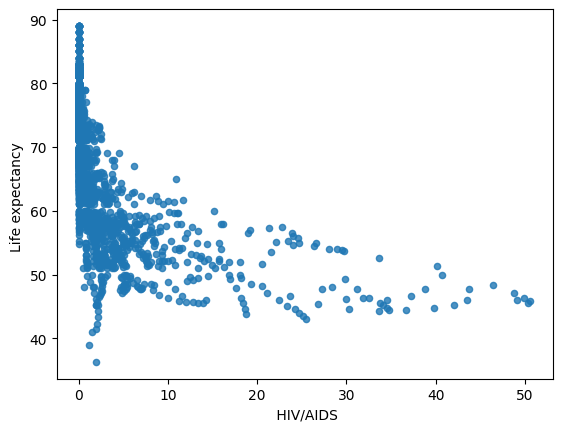

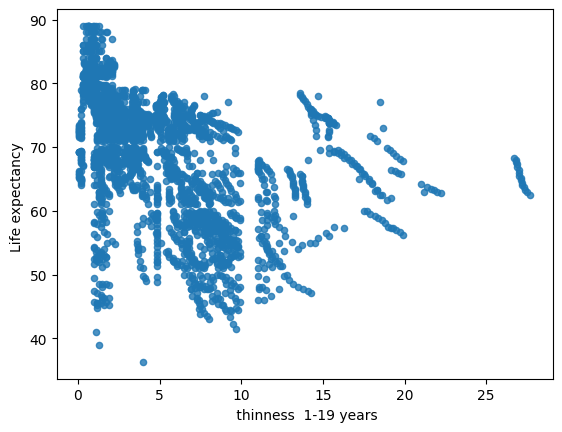

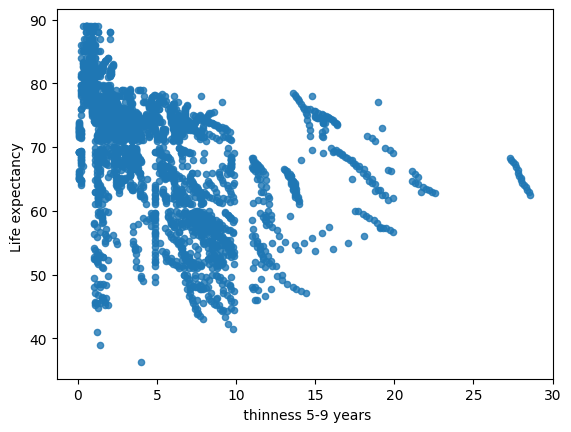

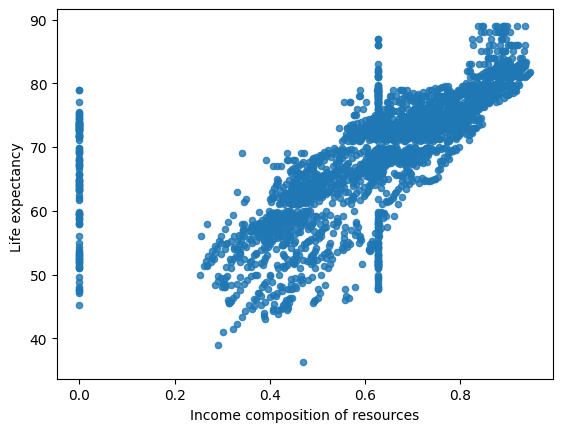

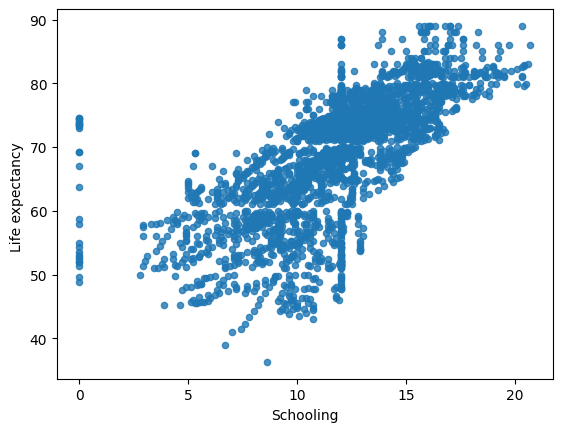

In [ ]:
#Scatter Plots
df.plot(kind="scatter", x="Adult Mortality", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="infant deaths", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="Alcohol", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="percentage expenditure", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="Hepatitis B", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="Measles ", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x=" BMI ", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="under-five deaths ", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="Polio", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="Total expenditure", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="Diphtheria ", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x=" HIV/AIDS", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x=" thinness  1-19 years", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x=" thinness 5-9 years", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="Income composition of resources", y="Life expectancy ", alpha=0.8)
plt.show()
df.plot(kind="scatter", x="Schooling", y="Life expectancy ", alpha=0.8)
plt.show()

In [ ]:
# Assigning Dependent Variable as Life Expectancy & Independent Variable as BMI
# Linear Regression
X= df[["Income composition of resources" ]]
y= df["Life expectancy "]

In [ ]:
# Train Test Split Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the lr Model
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred= lr.predict(X_test)
# r2 reveal the strength of the model
print("r2 Value of the model:")
r2_score(y_test,y_pred)


r2 Value of the model:


0.45535971131432984

In [ ]:
print("MSE Value of the model:")
mean_squared_error(y_test,y_pred)


MSE Value of the model:


47.18506222521624

In [ ]:
print("Intercept of the model:")
lr.intercept_


Intercept of the model:


48.46638741349624

In [ ]:
print("Coefficient of the model:")
lr.coef_

Coefficient of the model:


array([32.98622526])

In [ ]:
# Multiple linear Regression
X= df.drop("Life expectancy ",axis=1)
y= df["Life expectancy "]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [ ]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred= lr.predict(X_test)

In [ ]:
print("r2 Value of the model:")
r2_score(y_test,y_pred)

r2 Value of the model:


0.8225460841766444

In [ ]:
print("MSE Value of the model:")
mean_squared_error(y_test,y_pred)

MSE Value of the model:


15.373769135661117

In [ ]:
print("Intercept of the model:")
lr.intercept_

Intercept of the model:


55.200174102301276

In [ ]:
print("Coefficient of the model:")
lr.coef_

Coefficient of the model:


array([-2.12134468e-02,  9.68226210e-02,  1.19014217e-01,  1.17958745e-04,
       -1.70597610e-02, -2.39609227e-05,  3.94321132e-02, -7.18783999e-02,
        2.79702857e-02,  5.99337033e-02,  4.03016053e-02, -4.61491716e-01,
        3.70956348e-05, -1.03038280e-09, -9.89012066e-02,  6.88948317e-03,
        6.62646455e+00,  6.49472006e-01])

In [ ]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [ ]:
# Check the predicted values
prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Deviation': y_test-y_pred})
prediction.head()

,Actual,Predicted,Deviation
2546,73.7,67.159815,6.540185
650,75.9,76.701238,-0.801238
1740,74.2,75.872017,-1.672017
177,76.8,78.234858,-1.434858
1377,51.9,46.773835,5.126165


In [ ]:
with open('Life Expectancy.pkl','wb') as f:
  pickle.dump(lr,f)

In [ ]:
with open('Life Expectancy.pkl','rb') as f:
  pickle.load(f)